VISUALIZACION

In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

ArchivoAEvaluar="austin1"


df=pd.read_csv('../Proyectofinal_airbnb/csv_files/'+ArchivoAEvaluar+'.csv')
df

,Unnamed: 0,title,guest_favorite,rating,number_reviews,type_host,hosting_time,price,all_reviews,complete_data_list
0,0,"2BED Private Room, At Domain&Q2",False,4.87,search\r\nLocation\r\nAnywhere\r\nCheck,Superhost,2 years hosting,€ 80,['everything was amazing! the only inconvenien...,['2 queen beds · Shared bathroom']
1,1,Austin Cabin,True,Rated 4.98 out of 5 stars.\r\n4.98,258,Superhost,3 years hosting,€ 112,"['Good host, nice and peaceful place. A wonder...",['4 guests · 1 bedroom · 1 bed · 1 bath']
2,2,Zilker Home walking distance to Zilker Park,True,Rated 4.98 out of 5 stars.\r\n4.98,402,Superhost,13 years hosting,€ 236,['The best Airbnb and host in all of Zilker!!'...,['5 guests · 2 bedrooms · 2 beds · 1 bath']
3,3,2 bedrm Private Pool on Lake Travis,True,Rated 4.93 out of 5 stars.\r\n4.93,331,Superhost,10 years hosting,€ 240,['Great place to stay close to wedding venues....,['2 guests · 2 bedrooms · 2 beds · 1 bath']
4,4,ATX Central Home RM3,False,4.92,search\r\nLocation\r\nAnywhere\r\nCheck,Superhost,9 years hosting,€ 92,['I can say Sam’s place is a hidden gem in sou...,['1 queen bed · Shared bathroom']
...,...,...,...,...,...,...,...,...,...,...
139,139,Master Suite/Own Entrance 20 min to downtown/l...,True,Rated 4.96 out of 5 stars.\r\n4.96,148,Superhost,6 years hosting,€ 129,"['As always, it is clean and comfortable. I en...",['1 king bed · Private attached bathroom']
140,140,Garage Studio Apartment in Brentwood,True,Rated 5.0 out of 5 stars.\r\n5.0,28,Superhost,2 years hosting,€ 165,"['Great place! ! Exceptionally clean, great lo...",['2 guests · 1 bedroom · 1 bed · 1 bath']
141,141,Cozy Condo in Central Austin,True,Rated 5.0 out of 5 stars.\r\n5.0,71,Superhost,2 years hosting,€ 54,"['Wonderful, pleasant condo in quiet neighborh...",['2 guests · 1 bedroom · 1 bed · 1 bath']
142,142,Cozy Austin home 3BR near restaurants/bars,True,Rated 4.97 out of 5 stars.\r\n4.97,33,Superhost,11 months hosting,€ 126,['Home is set up nicely and it was a great way...,['6 guests · 3 bedrooms · 3 beds · 2 baths']


In [7]:
#df['rating'].str.extract(r'(\d\.\d{1,2})$').astype(float)
df['guest_favorite'].astype(int)

0      0
1      1
2      1
3      1
4      0
      ..
139    1
140    1
141    1
142    1
143    1
Name: guest_favorite, Length: 144, dtype: int64

In [8]:
import re

def con_a_meses(hosting_time):
    # Buscar "years" y convertir a meses
    years_match = re.search(r'(\d+)\s+years', hosting_time)
    if years_match:
        years = int(years_match.group(1))
        return years * 12
    
    years_match = re.search(r'(\d+)\s+year', hosting_time)
    if years_match:
        years = int(years_match.group(1))
        return years * 12
    
    # Buscar "months" y dejar en meses
    months_match = re.search(r'(\d+)\s+months', hosting_time)
    if months_match:
        months = int(months_match.group(1))
        return months
    
    # Buscar "days" y convertir a meses (aprox. 30 días = 1 mes)
    days_match = re.search(r'(\d+)\s+days', hosting_time)
    if days_match:
        days = int(days_match.group(1))
        return days / 30  # Convertir días a meses
    
    return 0  # Si no hay coincidencia, devolver 0 meses

def limpiezadedatos(df):
    # Limpiar la columna rating: extraer los últimos 4 dígitos y convertir a float
    df['rating'] = df['rating'].str.extract(r'(\d\.\d{1,2})$').astype(float)

    # Convertir number_reviews a float
    df['number_reviews'] = pd.to_numeric(df['number_reviews'], errors='coerce')

    # Limpiar la columna price: eliminar símbolos y convertir a float
    df['price'] = df['price'].replace({'[€,$]': '', ',': ''}, regex=True).astype(float)

    # Convertimos a meses 
    df['hosting_time'] = df['hosting_time'].apply(con_a_meses)

    # Convertimos los true y false
    df['guest_favorite'] = df['guest_favorite'].astype(int)

    # Guardar el dataframe limpio en un nuevo CSV
    df.to_csv('../Proyectofinal_airbnb/csv_files/Archivo'+ArchivoAEvaluar+'limpio.csv', index=False)

    return df


df_limpio = limpiezadedatos(df)


In [9]:
df

,Unnamed: 0,title,guest_favorite,rating,number_reviews,type_host,hosting_time,price,all_reviews,complete_data_list
0,0,"2BED Private Room, At Domain&Q2",0,4.87,NaN,Superhost,24,80.0,['everything was amazing! the only inconvenien...,['2 queen beds · Shared bathroom']
1,1,Austin Cabin,1,4.98,258.0,Superhost,36,112.0,"['Good host, nice and peaceful place. A wonder...",['4 guests · 1 bedroom · 1 bed · 1 bath']
2,2,Zilker Home walking distance to Zilker Park,1,4.98,402.0,Superhost,156,236.0,['The best Airbnb and host in all of Zilker!!'...,['5 guests · 2 bedrooms · 2 beds · 1 bath']
3,3,2 bedrm Private Pool on Lake Travis,1,4.93,331.0,Superhost,120,240.0,['Great place to stay close to wedding venues....,['2 guests · 2 bedrooms · 2 beds · 1 bath']
4,4,ATX Central Home RM3,0,4.92,NaN,Superhost,108,92.0,['I can say Sam’s place is a hidden gem in sou...,['1 queen bed · Shared bathroom']
...,...,...,...,...,...,...,...,...,...,...
139,139,Master Suite/Own Entrance 20 min to downtown/l...,1,4.96,148.0,Superhost,72,129.0,"['As always, it is clean and comfortable. I en...",['1 king bed · Private attached bathroom']
140,140,Garage Studio Apartment in Brentwood,1,5.00,28.0,Superhost,24,165.0,"['Great place! ! Exceptionally clean, great lo...",['2 guests · 1 bedroom · 1 bed · 1 bath']
141,141,Cozy Condo in Central Austin,1,5.00,71.0,Superhost,24,54.0,"['Wonderful, pleasant condo in quiet neighborh...",['2 guests · 1 bedroom · 1 bed · 1 bath']
142,142,Cozy Austin home 3BR near restaurants/bars,1,4.97,33.0,Superhost,11,126.0,['Home is set up nicely and it was a great way...,['6 guests · 3 bedrooms · 3 beds · 2 baths']


In [10]:

#df['rating_cleaned'].isna().sum()
#df['number_reviews_cleaned'].isna().sum()
#df['price_cleaned'].isna().sum()

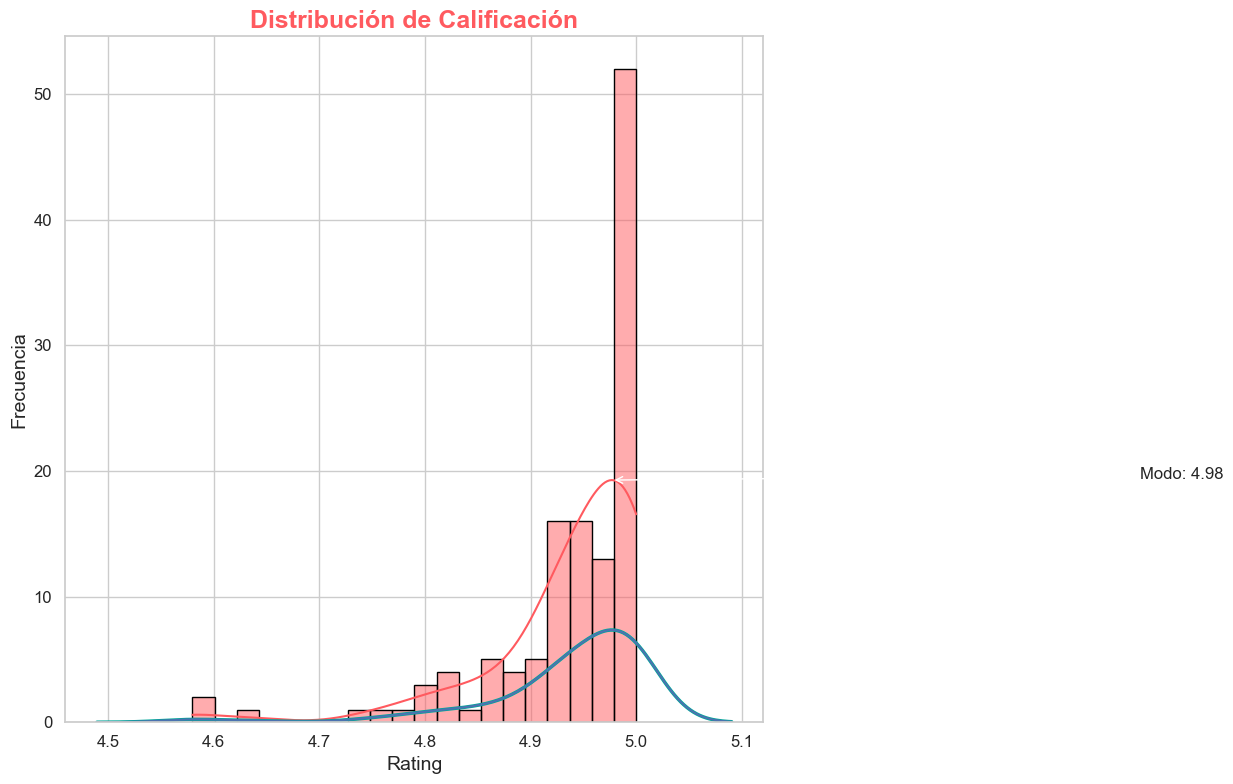

In [44]:
# Definir estilo y paleta de colores amigables
sns.set(style='whitegrid')  # Estilo más limpio y profesional
palette = ['#FF5A5F', '#FFB400', '#00A699', '#FC642D']  # Colores inspirados en la paleta de Airbnb

# Crear la figura y el gráfico
plt.figure(figsize=(15, 8))
sns.histplot(df['rating'], kde=True, bins=20, color=palette[0], edgecolor='black')

# Título y etiquetas personalizadas
plt.title('Distribución de Calificación', fontsize=18, weight='bold', color='#FF5A5F')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Ajustar el tamaño de las etiquetas del eje
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Añadir línea de KDE con mayor grosor
sns.kdeplot(df['rating'], color='#00A699', lw=2.5)

# Anotación en el punto de densidad máxima (modo) en la KDE
kde_data = sns.kdeplot(df['rating']).get_lines()[0].get_data()
max_density_x = kde_data[0][kde_data[1].argmax()]  # Encontrar el valor de X en el modo
max_density_y = kde_data[1].max()  # Encontrar la altura máxima de la curva KDE
plt.annotate(f'Modo: {max_density_x:.2f}', xy=(max_density_x, max_density_y), 
             xytext=(max_density_x + 0.5, max_density_y + 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

# Ajustar diseño para una mejor presentación
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Estrategias de Precio: Para los anfitriones, es crucial entender dónde se sitúan sus precios en relación con el mercado. Si la mayoría de las propiedades están en un rango de precios bajos, establecer precios significativamente más altos podría limitar la demanda.
Segmentación de Mercado: La existencia de una cola larga de precios más altos podría indicar oportunidades para segmentar el mercado, apuntando a clientes que buscan experiencias de lujo o premium.
Análisis Adicional: Para una comprensión más profunda, sería útil correlacionar estos datos de precios con otras variables, como la ubicación, el tipo de propiedad, o la calificación de los anfitriones. Esto permitiría obtener insights más completos sobre las dinámicas de precios en el mercado.

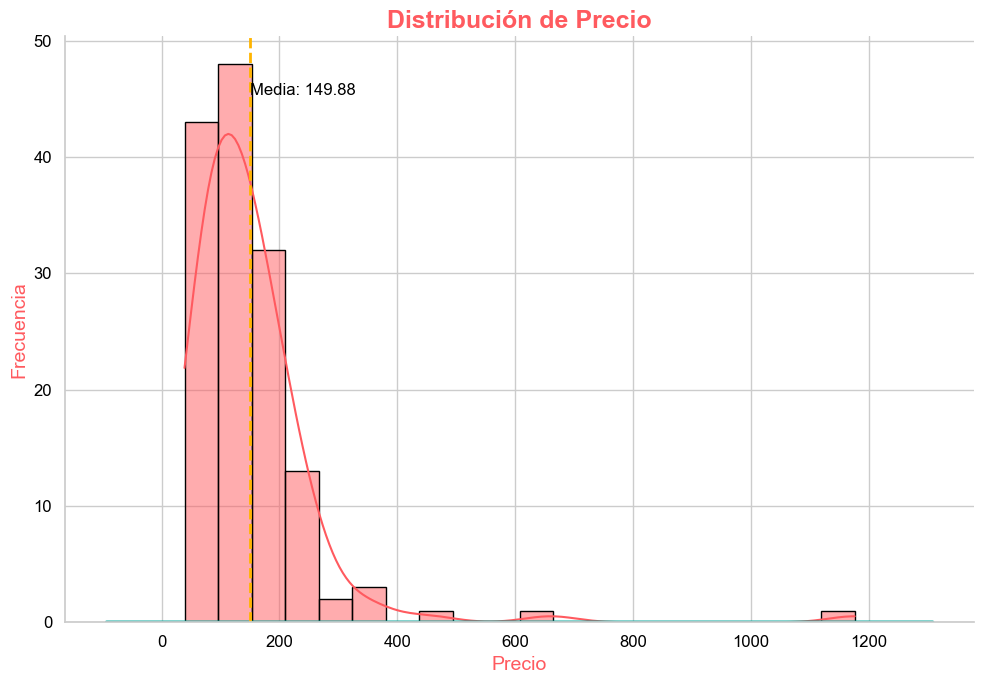

In [45]:
# Configurar el estilo y la paleta de colores
sns.set(style="whitegrid")  # Estilo profesional y limpio
palette = ['#FF5A5F', '#FFB400', '#00A699', '#FC642D']  # Colores inspirados en la paleta de Airbnb

# Crear la figura y el gráfico
plt.figure(figsize=(10, 7))
sns.histplot(df['price'], kde=True, bins=20, color=palette[0], edgecolor='black')

# Añadir línea de KDE más gruesa y en un color más oscuro
sns.kdeplot(df['price'], color=palette[2], lw=2.5)

# Título y etiquetas estilizadas
plt.title('Distribución de Precio', fontsize=18, weight='bold', color=palette[0])
plt.xlabel('Precio', fontsize=14, color=palette[0])
plt.ylabel('Frecuencia', fontsize=14, color=palette[0])

# Ajuste de las etiquetas del eje para mejorar la legibilidad
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Quitar el borde superior y derecho para un look más limpio
sns.despine()

# Anotación para destacar el valor medio de precio
mean_price = df['price'].mean()
plt.axvline(mean_price, color=palette[1], linestyle='--', lw=2)
plt.text(mean_price + 0.05, plt.ylim()[1] * 0.9, f'Media: {mean_price:.2f}', color='black', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()  # Ajustar diseño para evitar solapamientos
plt.show()


C:\Users\stehu\AppData\Local\Temp\ipykernel_2388\2785161998.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='type_host', y='price', data=df, inner=None, palette="coolwarm", cut=0)


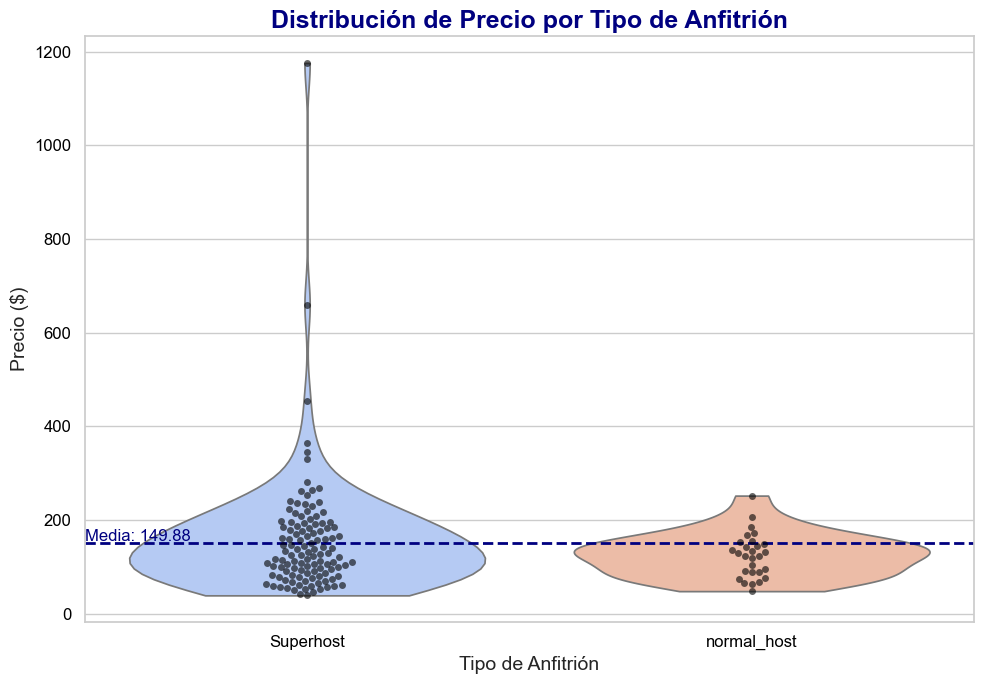

In [33]:
# Configurar el estilo y los colores
sns.set(style="whitegrid")  # Fondo limpio
palette = sns.color_palette("coolwarm", as_cmap=True)  # Paleta de colores atractiva

# Crear la figura y el gráfico
plt.figure(figsize=(10, 7))

# Graficar el violin plot para ver la distribución
sns.violinplot(x='type_host', y='price', data=df, inner=None, palette="coolwarm", cut=0)

# Añadir swarmplot para mostrar los puntos individuales
sns.swarmplot(x='type_host', y='price', data=df, color='black', alpha=0.6)

# Añadir título y etiquetas
plt.title('Distribución de Precio por Tipo de Anfitrión', fontsize=18, weight='bold', color='navy')
plt.xlabel('Tipo de Anfitrión', fontsize=14)
plt.ylabel('Precio ($)', fontsize=14)

# Personalización de los ticks en el eje
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Añadir línea horizontal para el precio medio
mean_price = df['price'].mean()
plt.axhline(mean_price, color='navy', linestyle='--', lw=2)
plt.text(-0.5, mean_price + 5, f'Media: {mean_price:.2f}', color='navy', fontsize=12)

# Ajuste del diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

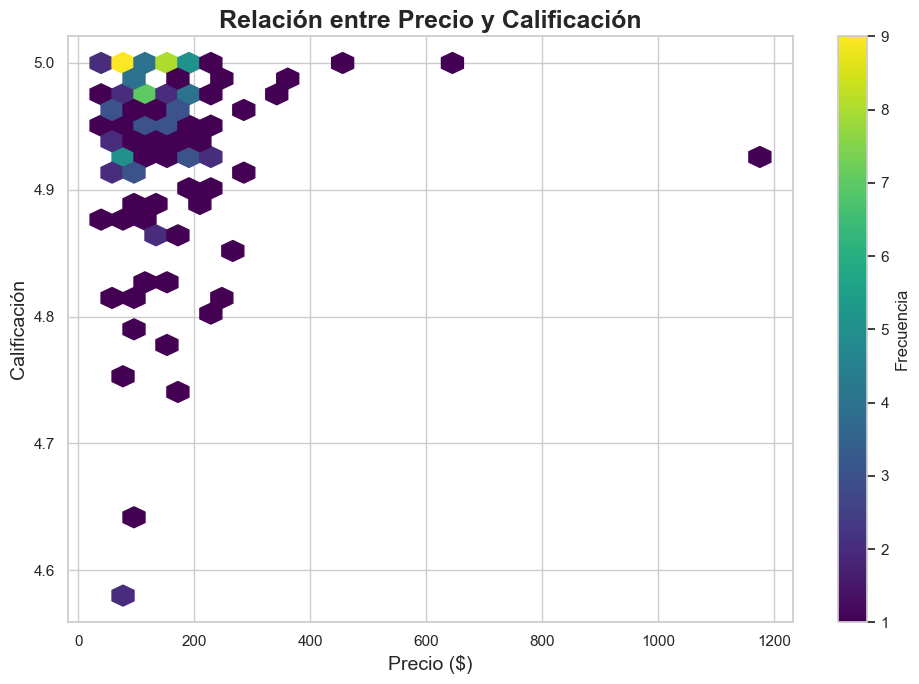

In [34]:

# Crear la figura y el hexbin plot
plt.figure(figsize=(10, 7))
hb = plt.hexbin(df['price'], df['rating'], gridsize=30, cmap='viridis', mincnt=1)

# Añadir color bar
cb = plt.colorbar(hb)
cb.set_label('Frecuencia')

# Título y etiquetas
plt.title('Relación entre Precio y Calificación', fontsize=18, weight='bold')
plt.xlabel('Precio ($)', fontsize=14)
plt.ylabel('Calificación', fontsize=14)

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

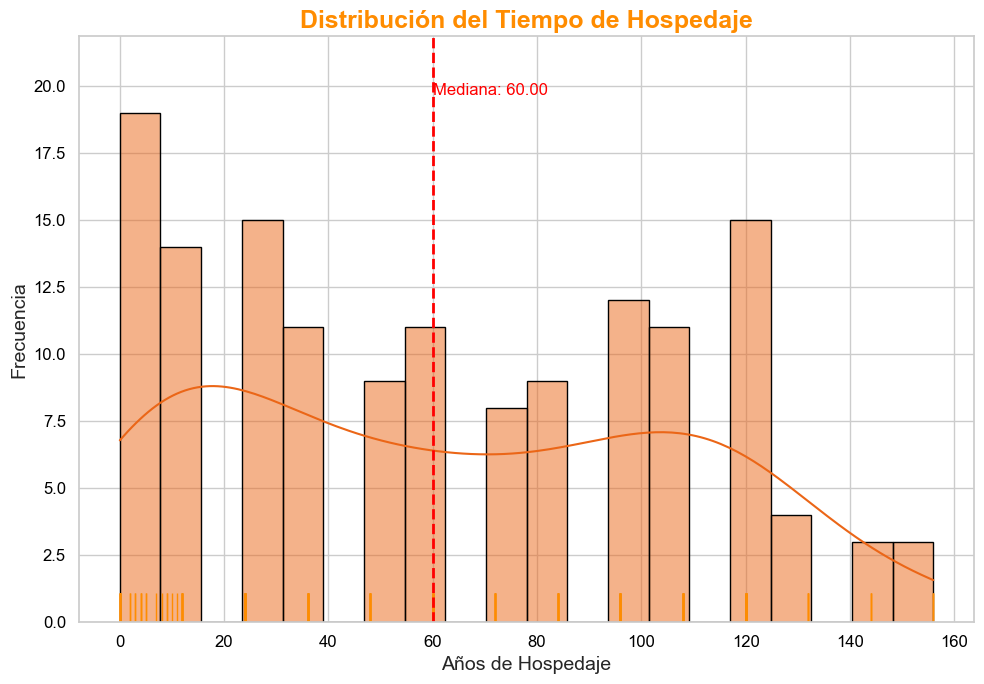

In [35]:
# Configurar el estilo y la paleta de colores
sns.set(style="whitegrid")  # Fondo claro y limpio
palette = sns.color_palette("Oranges_d", 10)  # Paleta en tonos naranjas

# Crear la figura
plt.figure(figsize=(10, 7))

# Histograma con KDE
sns.histplot(df['hosting_time'], kde=True, bins=20, color=palette[4], edgecolor='black')

# Añadir un rug plot (pequeñas marcas en el eje X para cada punto de datos)
sns.rugplot(df['hosting_time'], color='darkorange', height=0.05)

# Añadir una línea vertical para marcar la mediana del tiempo de hospedaje
median_time = df['hosting_time'].median()
plt.axvline(median_time, color='red', linestyle='--', lw=2)
plt.text(median_time + 0.1, plt.ylim()[1] * 0.9, f'Mediana: {median_time:.2f}', color='red', fontsize=12)

# Añadir títulos y etiquetas personalizadas
plt.title('Distribución del Tiempo de Hospedaje', fontsize=18, weight='bold', color='darkorange')
plt.xlabel('Años de Hospedaje', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Personalizar los ticks de los ejes
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Ajuste de diseño para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

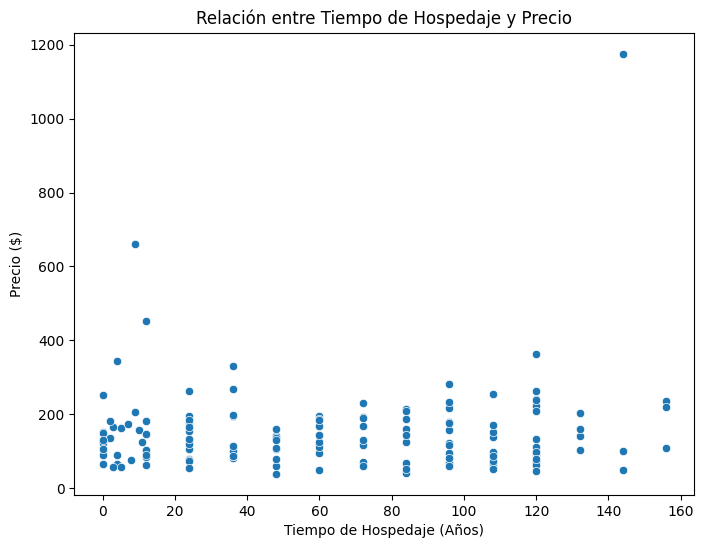

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='hosting_time', y='price', data=df)
plt.title('Relación entre Tiempo de Hospedaje y Precio')
plt.xlabel('Tiempo de Hospedaje (Años)')
plt.ylabel('Precio ($)')
plt.show()


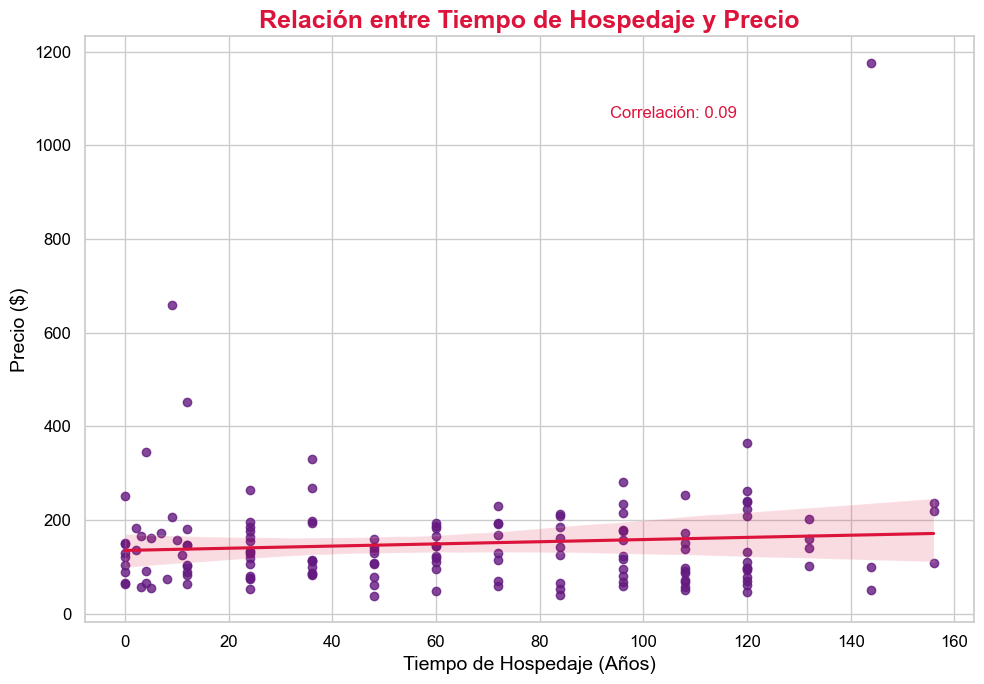

In [36]:

# Configurar el estilo y la paleta de colores
sns.set(style="whitegrid")  # Fondo claro y limpio
palette = sns.color_palette("magma", as_cmap=True)  # Colores en tonos cálidos

# Crear la figura
plt.figure(figsize=(10, 7))

# Gráfico de regresión con intervalos de confianza
sns.regplot(x='hosting_time', y='price', data=df, scatter_kws={'color': palette(0.3)}, 
            line_kws={'color': 'crimson'}, ci=95)

# Añadir títulos y etiquetas estilizadas
plt.title('Relación entre Tiempo de Hospedaje y Precio', fontsize=18, weight='bold', color='crimson')
plt.xlabel('Tiempo de Hospedaje (Años)', fontsize=14, color='black')
plt.ylabel('Precio ($)', fontsize=14, color='black')

# Calcular la correlación de Pearson para destacar la relación
corr_value = df[['hosting_time', 'price']].corr().iloc[0, 1]
plt.text(df['hosting_time'].max() * 0.6, df['price'].max() * 0.9, f'Correlación: {corr_value:.2f}', 
         fontsize=12, color='crimson')

# Personalización de los ticks del eje
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Permite observar la relación entre todas las combinaciones de las variables seleccionadas (en este caso, price, rating, number_reviews, y hosting_time), lo cual es útil para identificar patrones y correlaciones.
Identificación de Tendencias: Ayuda a identificar tendencias, distribuciones y posibles outliers en los datos.
Perspectiva General: Ofrece una vista global de los datos, facilitando la comprensión de cómo se relacionan entre sí.

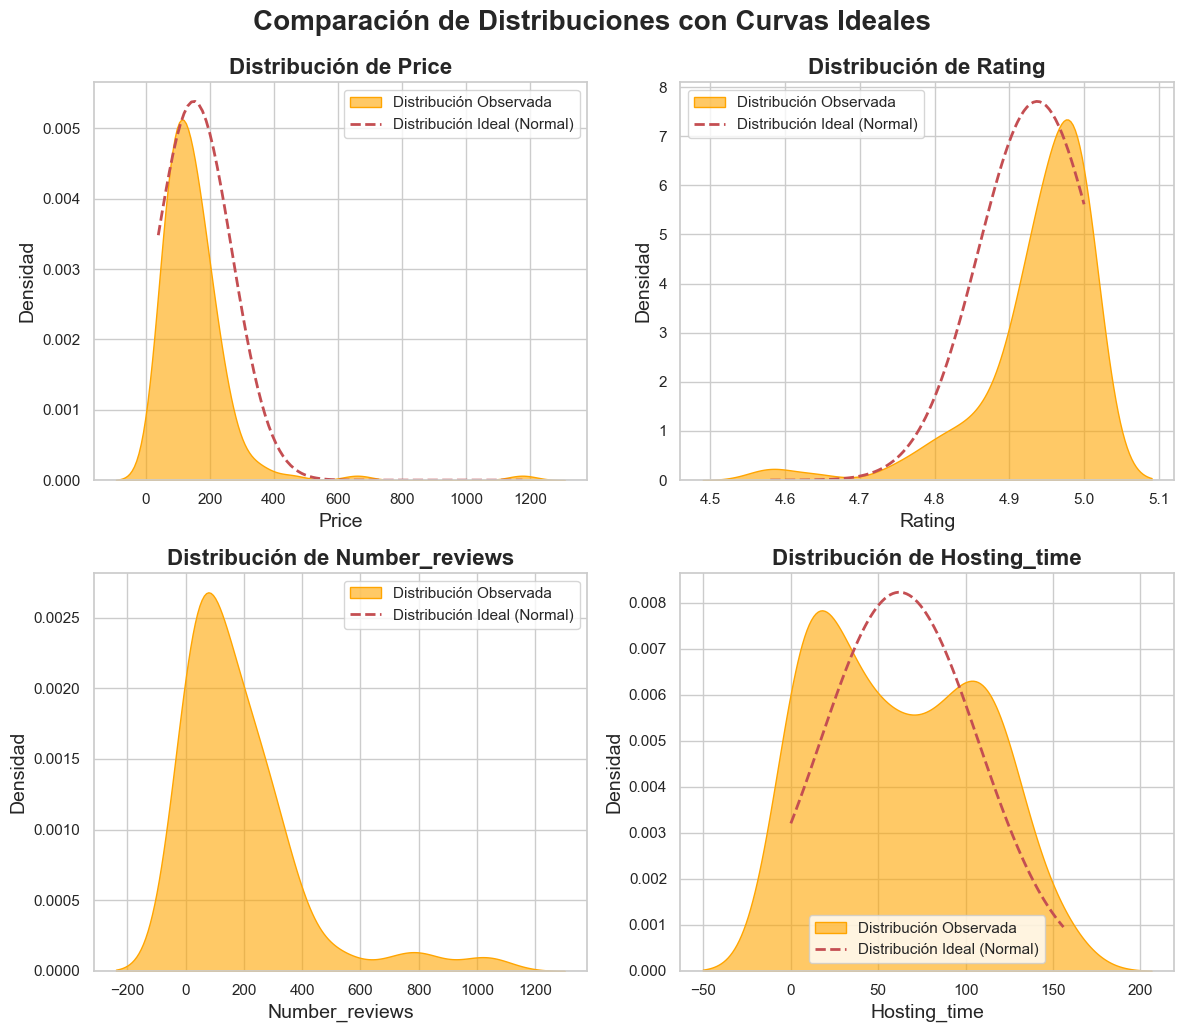

In [38]:
# Crear una figura
plt.figure(figsize=(12, 10))

# Lista de variables a graficar
variables = ['price', 'rating', 'number_reviews', 'hosting_time']

# Iterar sobre las variables para crear subgráficos
for i, var in enumerate(variables):
    plt.subplot(2, 2, i + 1)
    
    # Gráfico de densidad de la variable
    sns.kdeplot(df[var], fill=True, color='orange', alpha=0.6, label='Distribución Observada')
    
    # Calcular la media y desviación estándar
    mu, std = np.mean(df[var]), np.std(df[var])
    
    # Crear una distribución normal ideal basada en los parámetros observados
    x = np.linspace(min(df[var]), max(df[var]), 100)
    p = stats.norm.pdf(x, mu, std)
    
    # Normalizar la distribución ideal para que se ajuste al gráfico
    p = p / p.max() * max(plt.ylim())  # Ajustar la escala
    plt.plot(x, p, 'r--', label='Distribución Ideal (Normal)', lw=2)

    # Títulos y etiquetas
    plt.title(f'Distribución de {var.capitalize()}', fontsize=16, weight='bold')
    plt.xlabel(var.capitalize(), fontsize=14)
    plt.ylabel('Densidad', fontsize=14)
    plt.legend()

# Ajustar el diseño para evitar superposición
plt.tight_layout()

# Mostrar el gráfico
plt.suptitle('Comparación de Distribuciones con Curvas Ideales', fontsize=20, weight='bold', y=1.03)
plt.show()

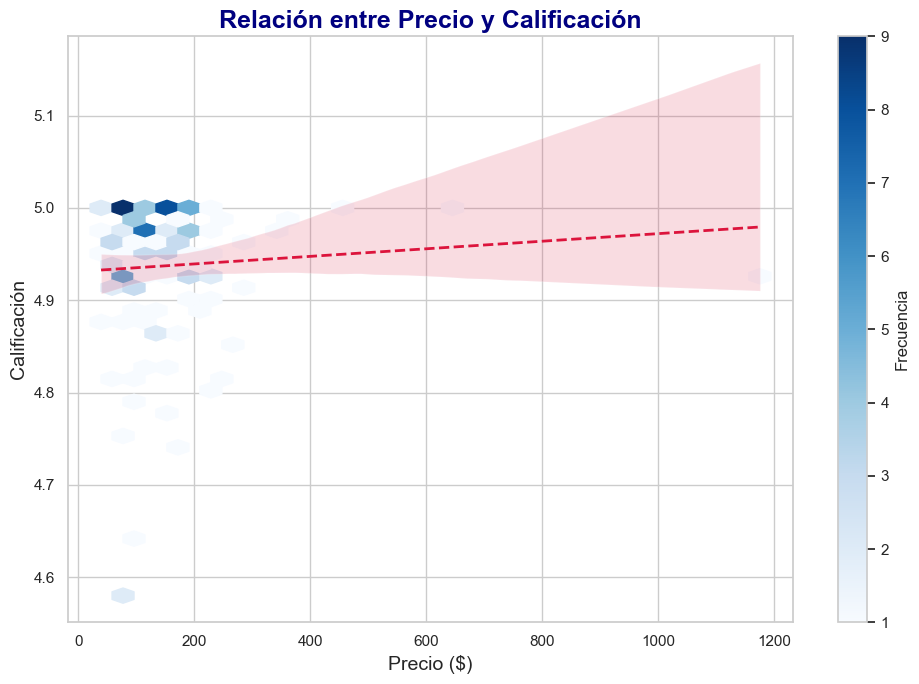

In [39]:
# Crear la figura
plt.figure(figsize=(10, 7))

# Gráfico hexbin para la relación entre precio y calificación
plt.hexbin(df['price'], df['rating'], gridsize=30, cmap='Blues', mincnt=1)

# Añadir color bar para mostrar la frecuencia
cb = plt.colorbar(label='Frecuencia')

# Calcular y graficar la línea de regresión
sns.regplot(x='price', y='rating', data=df, scatter=False, color='crimson', 
            line_kws={'linewidth': 2, 'linestyle': '--'})

# Títulos y etiquetas
plt.title('Relación entre Precio y Calificación', fontsize=18, weight='bold', color='navy')
plt.xlabel('Precio ($)', fontsize=14)
plt.ylabel('Calificación', fontsize=14)

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Descripción de las Mejoras en el Gráfico:

    Gráfico de Densidad: 
        Cambiamos el tipo de gráfico a un gráfico de densidad (KDE), que muestra la concentración de puntos en lugar de puntos individuales. Esto ayuda a visualizar mejor las áreas con alta densidad de observaciones.
    Línea de Regresión: 
        Se añade una línea de regresión (en rojo) que ayuda a visualizar la tendencia general entre las dos variables.
    Colores Mejorados: 
        Usamos una paleta de colores en tonos azules, que es agradable a la vista y profesional.
    Títulos y Etiquetas Claras: 
        Un título claro y etiquetas de ejes mejoran la comprensión del gráfico.
    Estilo Consistente: 
        Se aplica un estilo de fondo blanco y una cuadrícula para facilitar la lectura del gráfico.

Beneficios de Esta Visualización:
    La combinación de densidad y regresión proporciona una comprensión más profunda de cómo se relacionan number_reviews y rating.
    Es más fácil identificar áreas de interés, como la relación positiva entre el número de reseñas y las calificaciones.
    El diseño es más atractivo y profesional, ideal para presentaciones académicas.

<Figure size 1000x800 with 0 Axes>

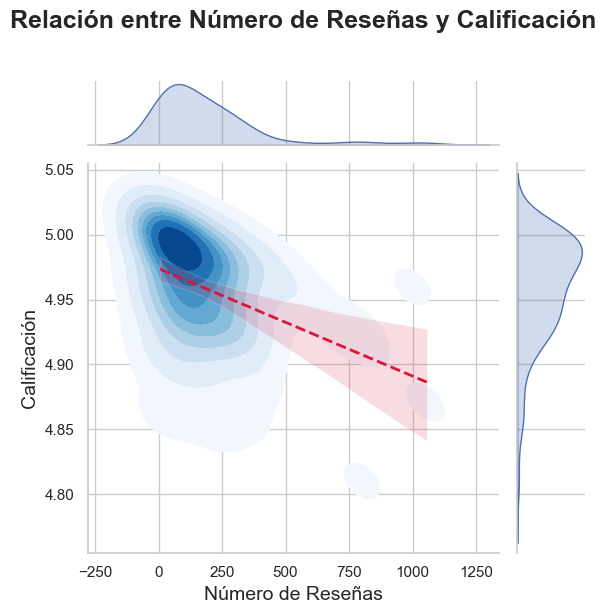

In [40]:
# Filtrar las filas donde 'rating' y 'number_reviews' no contengan 'reviews'
df_cleaned = df[(df['rating'] != 'reviews') & (df['number_reviews'] != 'reviews')].copy()

# Convertir las columnas 'rating' y 'number_reviews' a numérico
df_cleaned['rating'] = pd.to_numeric(df_cleaned['rating'], errors='coerce')
df_cleaned['number_reviews'] = pd.to_numeric(df_cleaned['number_reviews'], errors='coerce')

# Eliminar filas con NaN en 'rating' o 'number_reviews'
df_cleaned = df_cleaned.dropna(subset=['rating', 'number_reviews'])

# Crear el gráfico conjunto (jointplot) con mejoras
plt.figure(figsize=(10, 8))
sns.set(style='whitegrid')

# Usar un gráfico de densidad en lugar de scatter
g = sns.jointplot(x='number_reviews', y='rating', data=df_cleaned, kind='kde', cmap='Blues', fill=True)

# Añadir una línea de regresión
sns.regplot(x='number_reviews', y='rating', data=df_cleaned, scatter=False, ax=g.ax_joint, 
            color='crimson', line_kws={'linewidth': 2, 'linestyle': '--'})

# Mejorar el título y las etiquetas
g.fig.suptitle('Relación entre Número de Reseñas y Calificación', fontsize=18, weight='bold', y=1.02)
g.ax_joint.set_xlabel('Número de Reseñas', fontsize=14)
g.ax_joint.set_ylabel('Calificación', fontsize=14)

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

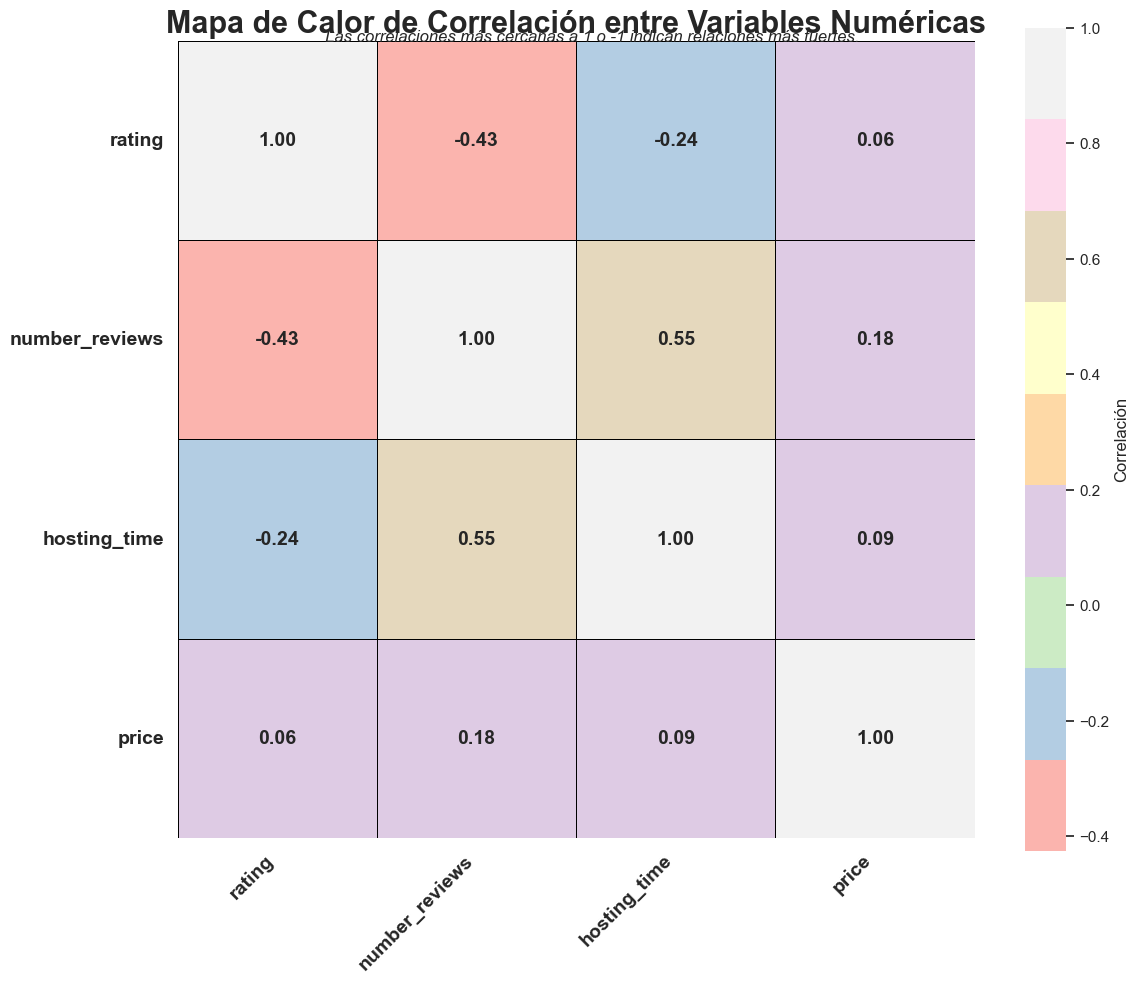

In [42]:


# Calcular la matriz de correlación
numeric_cols = ['rating', 'number_reviews', 'hosting_time', 'price']
correlation_matrix = df[numeric_cols].corr()

# Configurar el estilo
sns.set(style='whitegrid')

# Crear el mapa de calor
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', linewidths=0.5, 
                       fmt=".2f", cbar_kws={'label': 'Correlación'}, 
                       annot_kws={"size": 14, "weight": "bold"}, 
                       square=True, linecolor='black')

# Mejorar la legibilidad
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14, weight='bold')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=14, weight='bold')

# Título del mapa de calor
plt.title('Mapa de Calor de Correlación entre Variables Numéricas', fontsize=22, weight='bold')

# Descripción breve
plt.figtext(0.5, 0.95, 'Las correlaciones más cercanas a 1 o -1 indican relaciones más fuertes.', 
             ha='center', fontsize=12, style='italic')

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()
